In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#ML libraries
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs


#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [3]:
df = pd.read_csv('balance-scale.csv')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


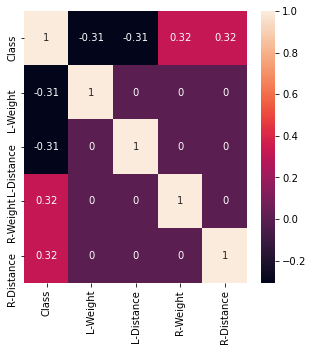

In [5]:
#Visualization after doing label encoding
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())

#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (5, 5))
sns.heatmap(df.corr(), annot = True)

In [6]:
y = df[['Class']]
X = df.drop(['Class'], axis = 1)

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

In [8]:
#Classification and prediction
#ExtraTreeClassifier

clf = ExtraTreesClassifier(n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0


In [9]:
#XGBoost

clf = XGBClassifier(learning_rate=0.5, n_jobs=-1, n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

[23:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy in percent =  85.0


In [10]:
#Random Forest

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0


In [11]:
#DT

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  75.0


In [12]:
#SVM

clf = SVC()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  95.0


In [13]:
#KNN

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  95.0
